<a href="https://colab.research.google.com/github/gitmystuff/DTSC3010/blob/main/Week_01/Inferential_Chapter_1_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inferential Chapter 1

Cliffo

In [ ]:
import requests

def read_url(url):
    return requests.get(url).text

# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [ ]:
# !pip install datascience

In [ ]:
# Display the chapters of Huckleberry Finn in a table.
from datascience import *

Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a bo ...
II. WE went tiptoeing along a path amongst the trees ...
"III. WELL, I got a good going-over in the morning fro ..."
"IV. WELL, three or four months run along, and it was ..."
V. I had shut the door to. Then I turned around and ...
"VI. WELL, pretty soon the old man was up and around a ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes a ..."
VIII. THE sun was up so high when I waked that I judg ...
IX. I wanted to go and look at a place right about th ...
X. AFTER breakfast I wanted to talk about the dead ma ...


Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

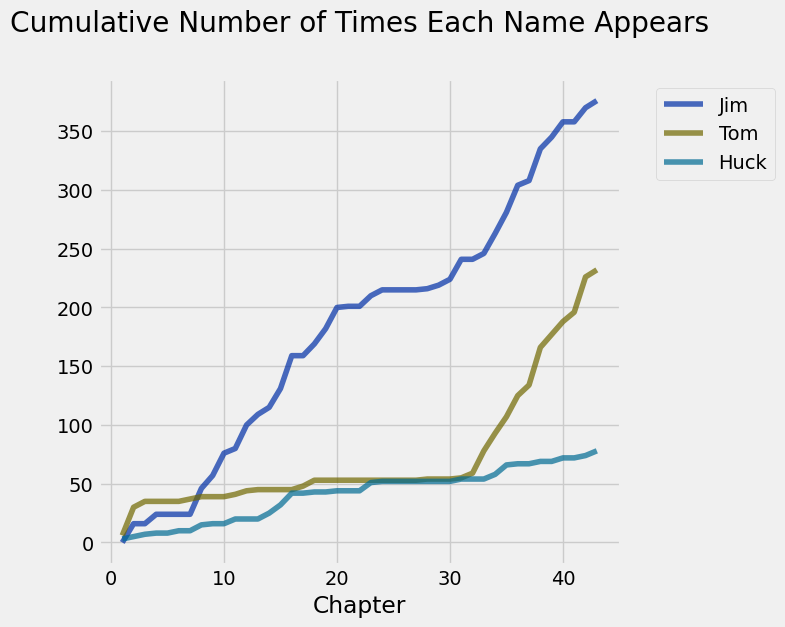

In [ ]:
# Get the cumulative counts the names Jim, Tom, and Huck appear in each chapter.
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

counts = Table().with_columns([
        'Jim', np.cumsum(np.char.count(huck_finn_chapters, 'Jim')),
        'Tom', np.cumsum(np.char.count(huck_finn_chapters, 'Tom')),
        'Huck', np.cumsum(np.char.count(huck_finn_chapters, 'Huck'))
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [ ]:
# The chapters of Little Women, in a table

Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to t ..."
"FIVE BEING NEIGHBORLY ""What in the world are you g ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a p ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you goin ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was th ..."
"TEN THE P.C. AND P.O. As spring came on, a new set ..."


Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

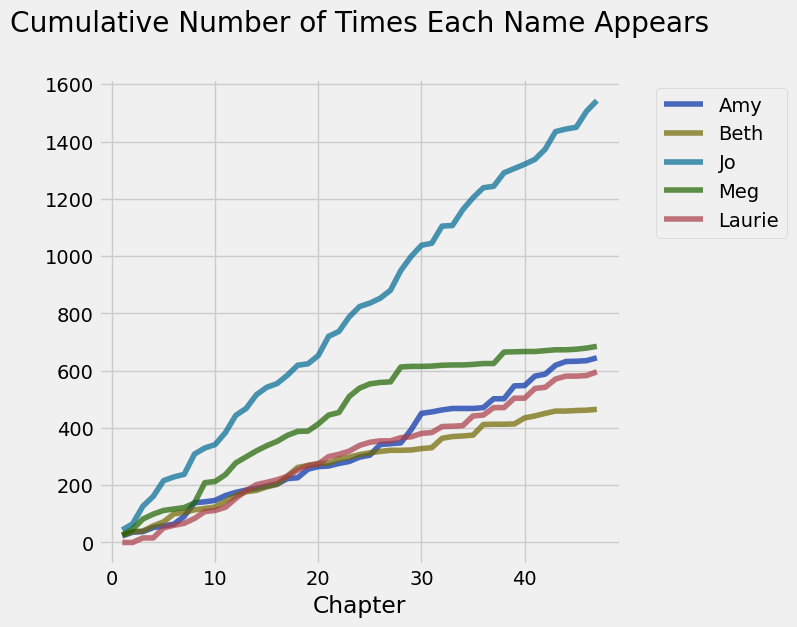

In [ ]:
# Get the cumulative counts of the names in the chapters of Little Women

counts = Table().with_columns([
        'Amy', np.cumsum(np.char.count(little_women_chapters, 'Amy')),
        'Beth', np.cumsum(np.char.count(little_women_chapters, 'Beth')),
        'Jo', np.cumsum(np.char.count(little_women_chapters, 'Jo')),
        'Meg', np.cumsum(np.char.count(little_women_chapters, 'Meg')),
        'Laurie', np.cumsum(np.char.count(little_women_chapters, 'Laurie')),

    ])

# Plot the cumulative counts.

cum_counts = counts.with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [ ]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [ ]:
chars_periods_huck_finn

Huck Finn Chapter Length,Number of Periods
7206,66
12352,117
8764,72
7029,84
8443,91
14910,125
13586,127
22935,249
8301,71
7234,70


In [ ]:
chars_periods_little_women

Little Women Chapter Length,Number of Periods
22408,189
22827,188
21295,231
26165,195
24199,255
15016,140
14851,131
23144,214
34756,337
20151,185


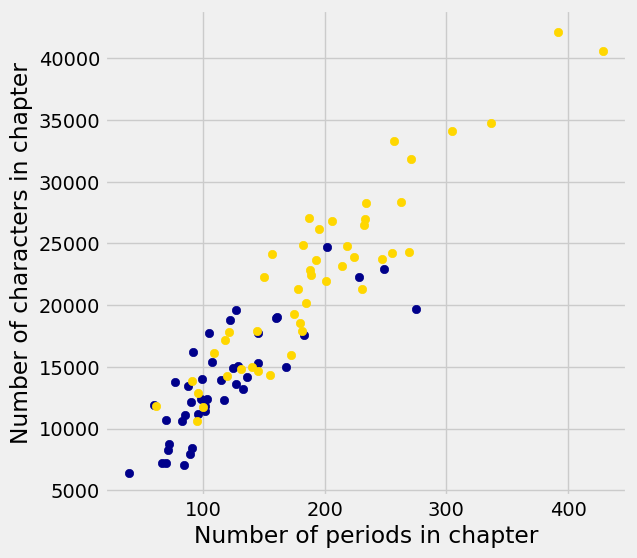

In [ ]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1),
              chars_periods_huck_finn.column(0),
              color='darkblue')
plots.scatter(chars_periods_little_women.column(1),
              chars_periods_little_women.column(0),
              color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');